# This is an exploratory data analysis on the stock prices of the Visa company.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('visa_stocks.csv')

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-03-19,14.875000,17.250000,13.7500,14.1250,12.579995,708486000
1,2008-03-20,14.600000,16.250000,14.3750,16.0875,14.327834,198985200
2,2008-03-24,16.809999,16.924999,14.7500,14.9325,13.299167,149566400
3,2008-03-25,15.145000,16.062500,14.9550,15.8125,14.082910,87092000
4,2008-03-26,15.682500,16.120001,15.3925,15.9900,14.240999,43111600


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4172,2024-10-15,281.000000,282.640015,278.829987,279.290009,279.290009,5807000
4173,2024-10-16,278.619995,287.600006,278.350006,287.519989,287.519989,9442700
4174,2024-10-17,288.570007,290.929993,287.609985,290.390015,290.390015,8815800
4175,2024-10-18,289.920013,291.040009,288.079987,290.619995,290.619995,5350900
4176,2024-10-21,289.600006,290.440002,286.329987,286.850006,286.850006,6312700


In [22]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4.177000e+03
mean,109.997006,110.988504,108.997184,110.016274,106.440847,1.459021e+07
std,84.678218,85.385175,83.960169,84.686806,84.244500,1.967747e+07
min,10.672500,11.047500,10.445000,10.605000,9.477159,1.640900e+06
25%,29.635000,29.934999,29.347500,29.737499,27.196886,6.622700e+06
50%,78.980003,79.650002,78.379997,79.040001,74.487785,9.420400e+06
75%,196.250000,198.830002,193.809998,196.160004,190.993469,1.538160e+07
max,291.839996,293.070007,290.079987,291.559998,291.559998,7.084860e+08


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4177 non-null   object 
 1   Open       4177 non-null   float64
 2   High       4177 non-null   float64
 3   Low        4177 non-null   float64
 4   Close      4177 non-null   float64
 5   Adj Close  4177 non-null   float64
 6   Volume     4177 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 228.6+ KB


In [6]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.count()

Date         4177
Open         4177
High         4177
Low          4177
Close        4177
Adj Close    4177
Volume       4177
dtype: int64

In [ ]:
data.nunique()

Date         4177
Open         3773
High         3815
Low          3804
Close        3853
Adj Close    4072
Volume       4105
dtype: int64

In [ ]:
from datetime import datetime

start_date = datetime(2008,3,19)
end_date = datetime(2024,10,21)

date = (end_date - start_date).days
# so I have noticed that there have been many dates not included so here is the 
print(f'number of how days have actually passed since recording started as opposed to 4177 days: {date} , ', date - 4177 , 'is the number of days missing since real time')

number of how days have actually passed since recording started as opposed to 4177 days: 6060 ,  1883 is the number of days missing since real time


## Considering the histograms below I have observed the following points:
1. All the histograms do not follow the general bell shaped graph but rather a simple high frequency distributions for the lower values.
2. The trade volume has been severly consistent for low values, most of trades, more like 4000+ have of number 0.1*10^8 trades which is still a big number but some have been of degree 2 3 5 and even 7 * 10^8.
3. All the opening ,closing, high and low values of the stock has been stable and eventually the stock price of individual shares have risen from 15 dollars to 270 dollars , therefore the company has grown by a high margin with stable values and hence giving the investors confidence in company.

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

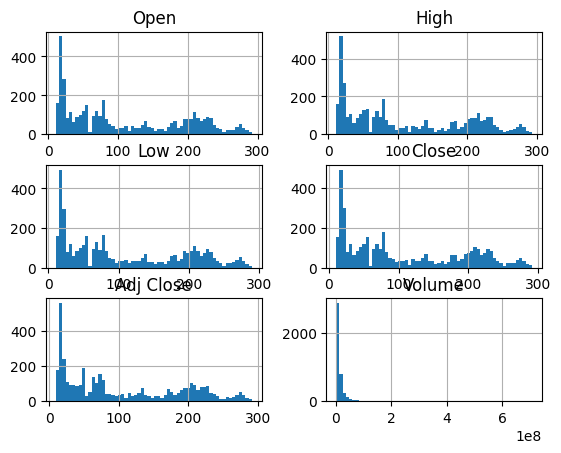

In [7]:
data.hist(bins = 60)

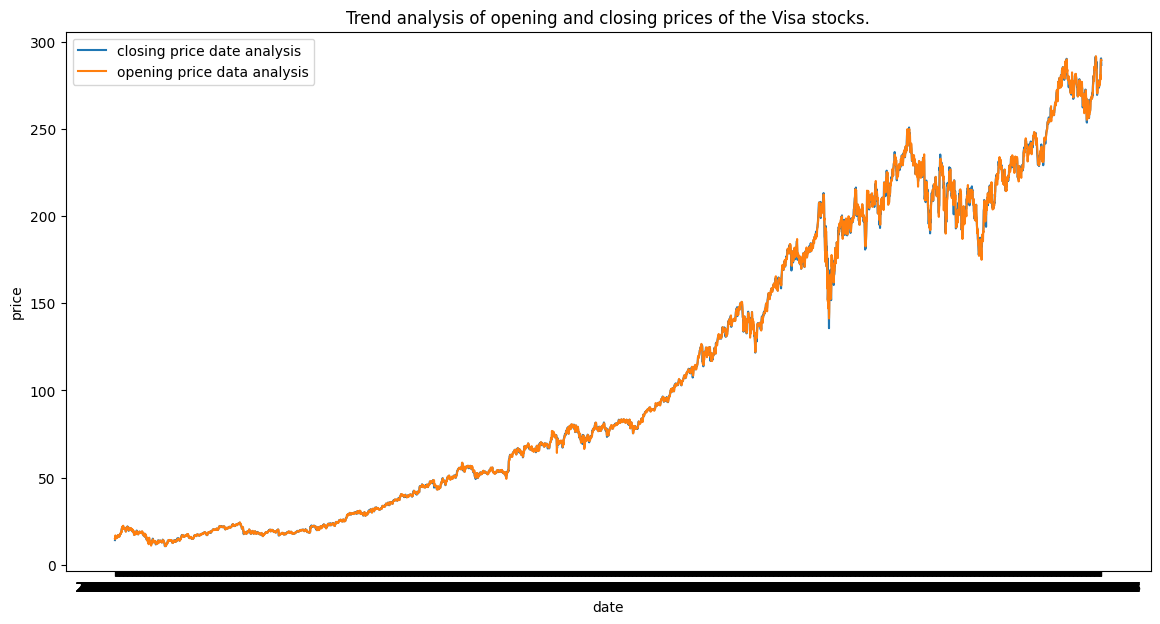

In [8]:
plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Close'], label = 'closing price date analysis')
plt.plot(data['Date'], data['Open'], label = 'opening price data analysis')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Trend analysis of opening and closing prices of the Visa stocks.')
plt.legend()
plt.show()

Well this shows that in the long run the stock has increased in price but on micro level for opening closing prices 
there has barely been any difference but at some points there has been some peaks showing the closing price was more than 
opening therefore profit and some showing lower peaks hence loss but in the grand scheme there have been more profits 
hence the graph has increased

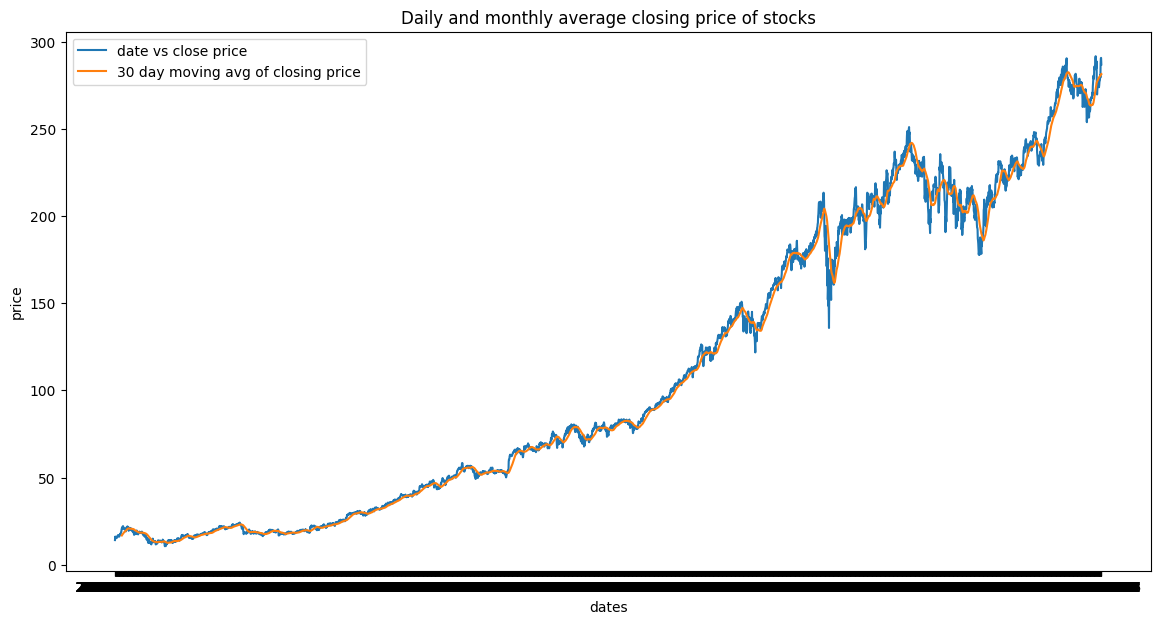

In [9]:
data['30_day_avgC'] = data['Close'].rolling(window = 30).mean()
# data['30_day_avgO'] = data['Close'].rolling(window = 30).mean()
plt.figure(figsize=(14,7))
plt.plot(data['Date'], data['Close'], label = 'date vs close price',)
plt.plot(data['Date'], data['30_day_avgC'], label = '30 day moving avg of closing price',)
# plt.plot(data['Date'], data['Open'], label = 'date vs open price',)
# plt.plot(data['Date'], data['30_day_avgO'], label = '30 day moving avg of opening price',)

# uncomment to see how opening prices also roll as of now just see the closing prices roll over a month
plt.xlabel('dates')
plt.ylabel('price')
plt.title('Daily and monthly average closing price of stocks')
plt.legend()
plt.show()

Towards the end of the timeframe, the stock shows sharp fluctuations on a daily basis, indicating volatility. However, the 30-day moving average smooths these variations, revealing a relatively stable upward trend over time.

<function matplotlib.pyplot.show(close=None, block=None)>

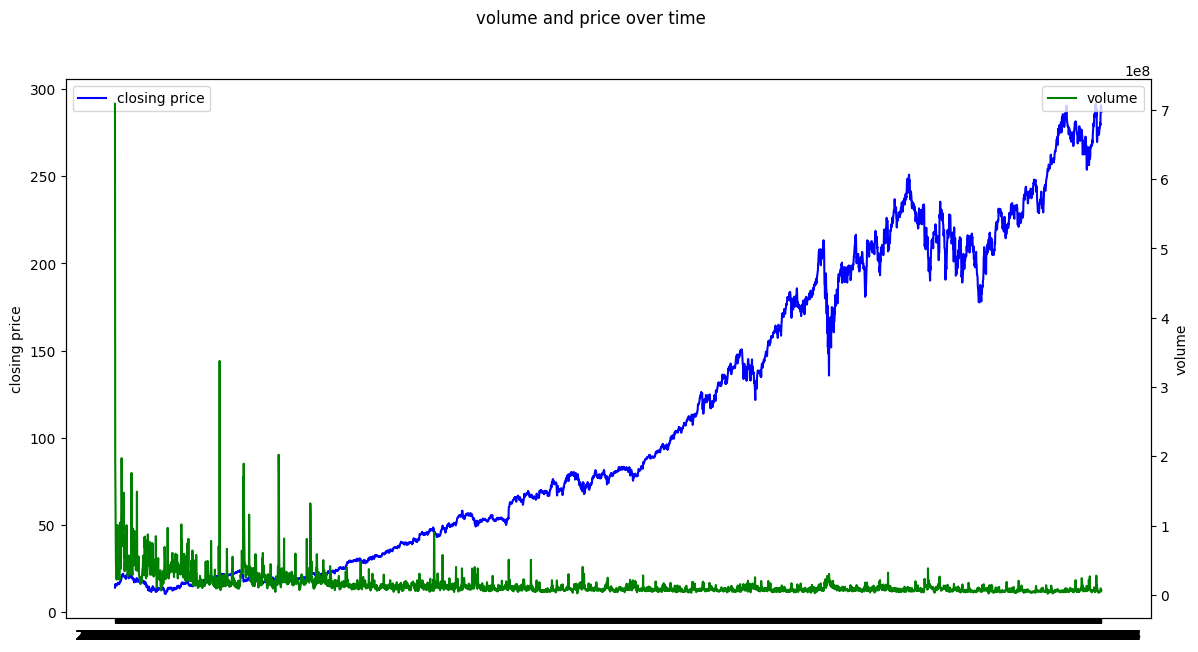

In [5]:
fig , ax1 = plt.subplots(figsize =(14,7))
ax1.plot(data['Date'], data['Close'], label = 'closing price', color = 'blue')
ax1.set_ylabel('closing price')
ax2 = ax1.twinx()
ax2.plot(data["Date"], data['Volume'], label = 'volume', color = 'green')
ax2.set_ylabel('volume')

fig.suptitle('volume and price over time')
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

plt.show()

### This is by far my most favourite graph I have noticed, as the days have elapsed and the prices of stocks increased people having doubt that whether the stock will remain stable or not realised it is a good investment and they have held onto their stocks, also on contary one can say people seeing the stocks have been expensive they stopped trading so frequently. When the stock was at 15 dollars there were 7*10^8 trades and when it got to 280 dollars it was less than 0.5 * 10^8 trades.

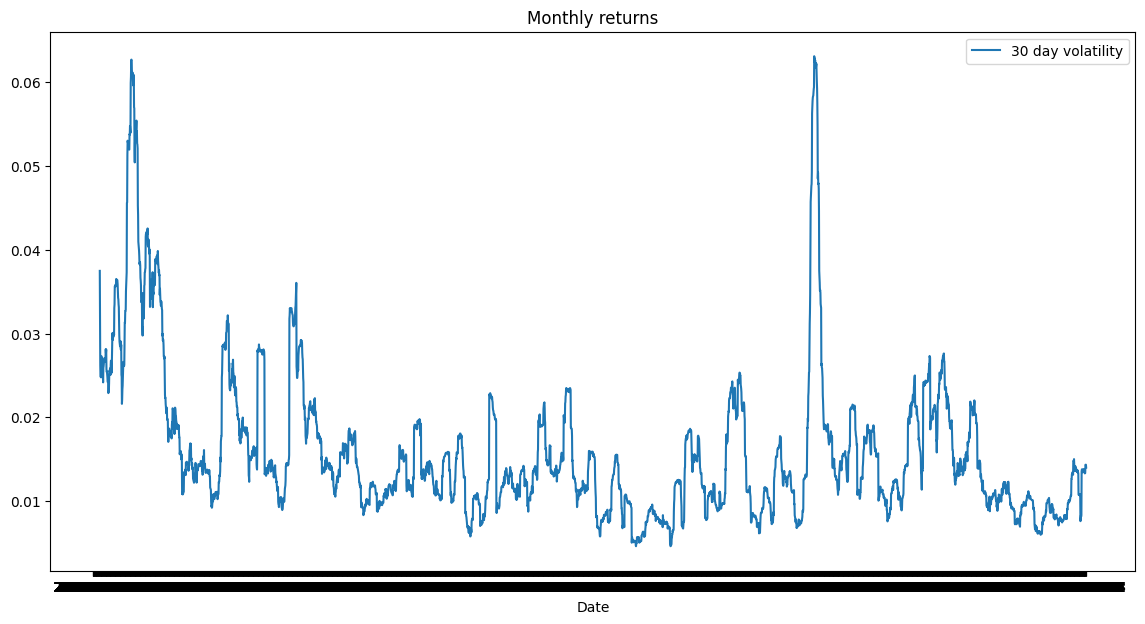

In [10]:
data['daily return'] = data['Close'].pct_change()
data['Volatility'] = data['daily return'].rolling(window = 30).std()

plt.figure(figsize = (14,7))
plt.plot(data['Date'], data['Volatility'], label = '30 day volatility')
plt.xlabel('Date')
plt.title('Monthly returns')
plt.legend()
plt.show()

This graph shows that on a monthly basis, the percent change of prices compared to last day, how the stock prices increased or decreased and the graph below shows that same thing but on daily basis.

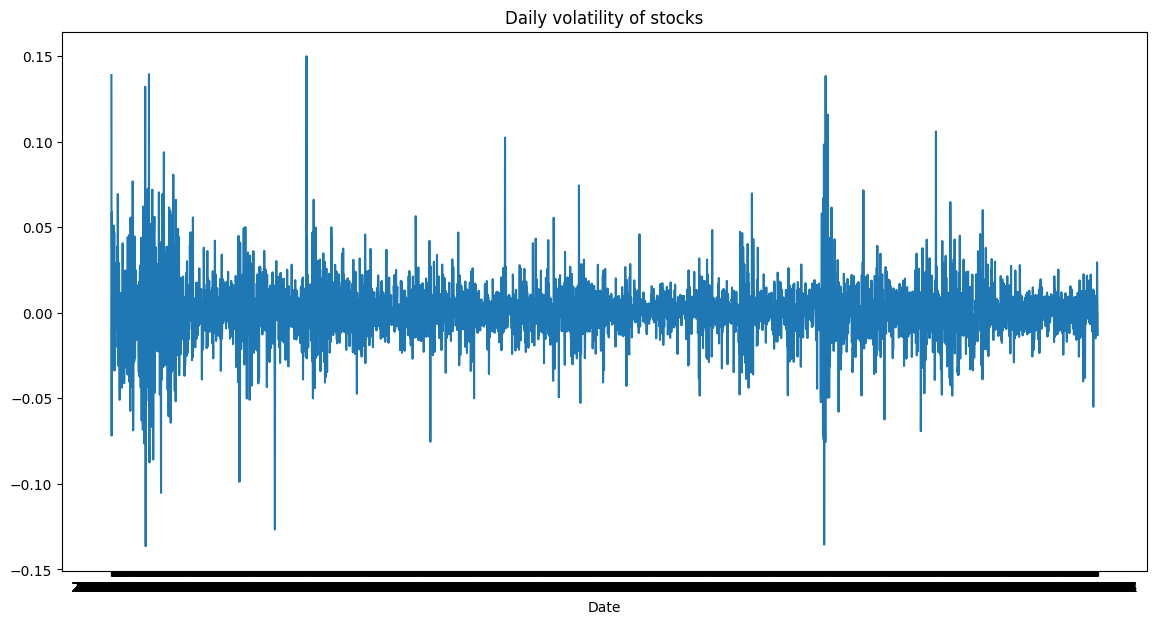

In [12]:
data['daly return'] = data['Close'].pct_change()
data['Volatility'] = data['daly return']

plt.figure(figsize = (14,7))
plt.plot(data['Date'], data['Volatility'])
plt.xlabel('Date')
plt.title('Daily volatility of stocks')
plt.show()

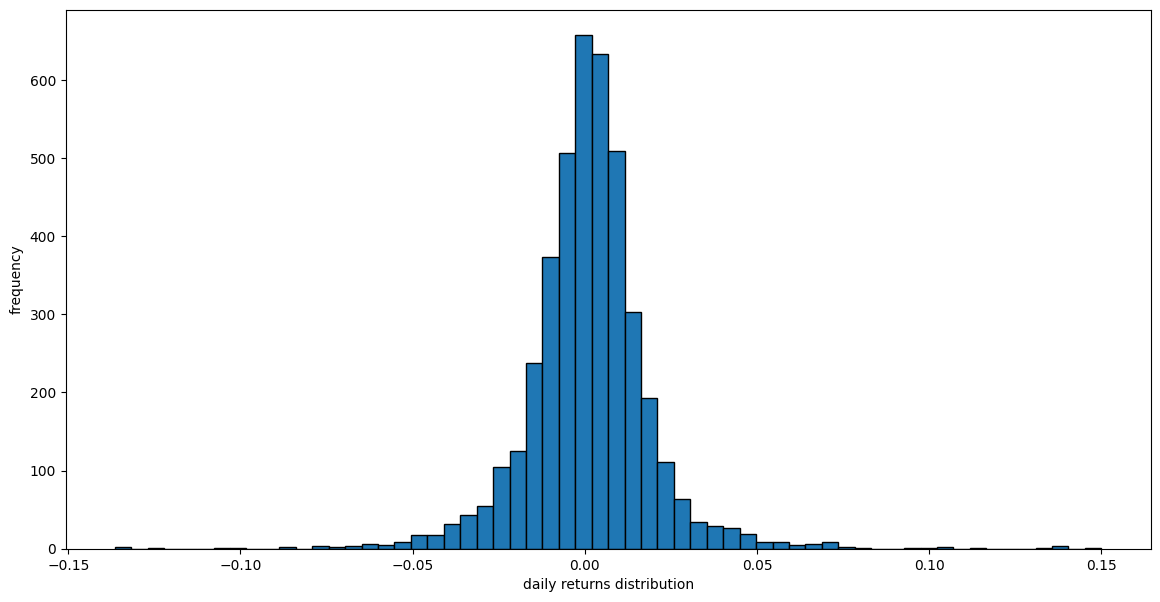

In [13]:
plt.figure(figsize=(14,7))
plt.hist(data['daily return'], edgecolor='black', bins= 60)
plt.xlabel('daily returns distribution')
plt.ylabel('frequency')
plt.show()

This histogram shows that the daily returns follow a simple bell curve where majority of returns have been of low value and very few returns were of extreme values of +- 0.15 showing the company has provided more of a stable and non aggresive returns lowering the anxiety of investors and showing overall Visa is a good company to invest in as it promises high long term returns with low anxiety.

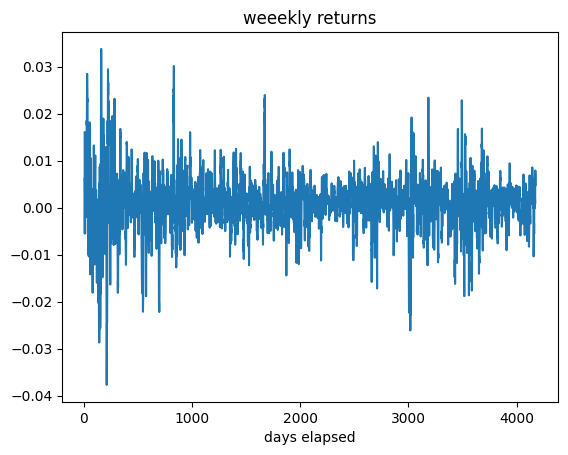

In [15]:
plt.plot(data['daily return'].rolling(window = 7).mean())
plt.title('weeekly returns')
plt.xlabel('days elapsed')
plt.show()